In [3]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
url = 'https://raw.githubusercontent.com/KAIR-ISZ/lectures/main/Data%20Analytics/Lab%205/Airline_data.csv'
df = pd.read_csv(url)

df

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0
5,1981,21,362,6033.0
6,1982,26,764,5877.0
7,1983,20,809,6223.0
8,1984,16,223,7433.0
9,1985,22,1066,7107.0


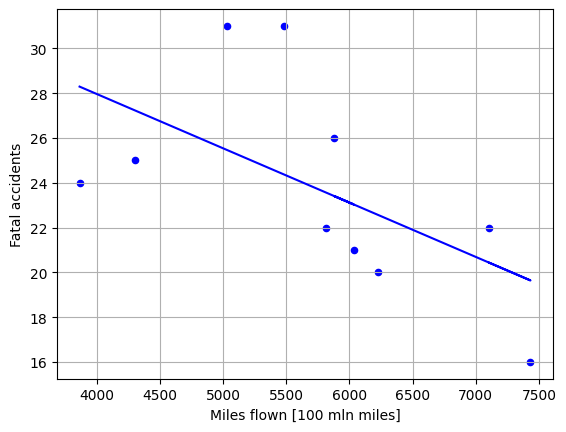

37.654277722061394 -0.00242385627944669
[3863. 4300. 5027. 5481. 5814. 6033. 5877. 6223. 7433. 7107.]


In [6]:
x = df["Miles flown [100 mln miles]"]
y = df['Fatal accidents']
df.plot(x="Miles flown [100 mln miles]", y="Fatal accidents", kind="scatter", grid=True, color = "b")
a,b = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, color = "b")
plt.show()
print(b, a)
print(x.values)

In [24]:
data_1 = {'N':len(df),'miles':x.values}

model_1 = CmdStanModel(stan_file = 'airline_prior.stan')
R = 1000
sim_model = model_1.sample(data = data_1, fixed_param = True)

14:45:38 - cmdstanpy - INFO - CmdStan start processing
chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed


14:45:38 - cmdstanpy - INFO - CmdStan done processing.


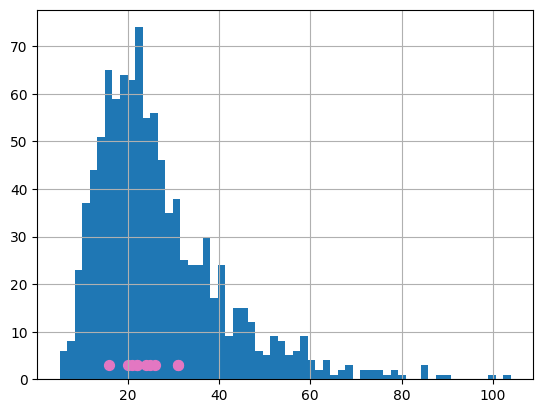

In [25]:
sim1 = sim_model.draws_pd()
sim1["Accidents"] = sim1[[f"y_sim[{i}]" for i in range(1,11)]].mean(axis=1)
sim1["Accidents"].hist(bins=60)
ys=np.full(
  shape=10,
  fill_value=3
)
plt.scatter(y,ys,s=50, color='tab:pink')

In [27]:
data_2 ={'N':len(df), 'miles':x.values, 'accidents':y}

model_2 =CmdStanModel(stan_file='airline_data.stan')

fit = model_2.sample(data=data_2)

14:46:02 - cmdstanpy - INFO - CmdStan start processing
chain 1 |                                                                                                | 00:00 Status
chain 2 |                                                                                                | 00:00 Status

chain 3 |                                                                                                | 00:00 Status


chain 4 |                                                                                                | 00:00 Status
chain 2 |████████████████████████████████████████████▎                | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |████████████████████████████████████                         | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 4 |████████████████████████████████████                         | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00


14:46:03 - cmdstanpy - INFO - CmdStan done processing.
14:46:03 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: poisson_rng: Rate parameter is 4.22779e+42, but must be less than 1073741824.000000 (in 'C:/Users/rafal/Documents/airline_data.stan', line 27, column 4 to column 46)
	Exception: poisson_rng: Rate parameter is 4.22776e+42, but must be less than 1073741824.000000 (in 'C:/Users/rafal/Documents/airline_data.stan', line 27, column 4 to column 46)
	Exception: poisson_rng: Rate parameter is 4.22767e+42, but must be less than 1073741824.000000 (in 'C:/Users/rafal/Documents/airline_data.stan', line 27, column 4 to column 46)
	Exception: poisson_rng: Rate parameter is 4.22765e+42, but must be less than 1073741824.000000 (in 'C:/Users/rafal/Documents/airline_data.stan', line 27, column 4 to column 46)
	Exception: poisson_rng: Rate parameter is 4.22763e+42, but must be less than 1073741824.000000 (in 'C:/Users/rafal/Documents/airline_data.stan', line 27, column 4 to 

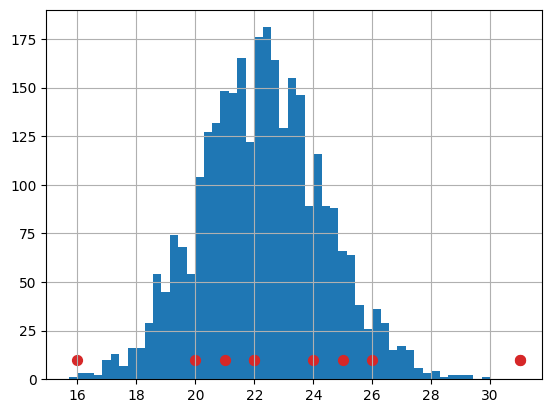

In [29]:
fit_pd = fit.draws_pd()
fit_pd["Accidents"] = fit_pd[[f"accidents_sim[{i}]" for i in range(1, 11)]].mean(axis=1)
fit_pd["Accidents"].hist(bins=50)
ys=np.full(
  shape=10,
  fill_value=10
)
plt.scatter(y,ys,s=50, color='tab:red')

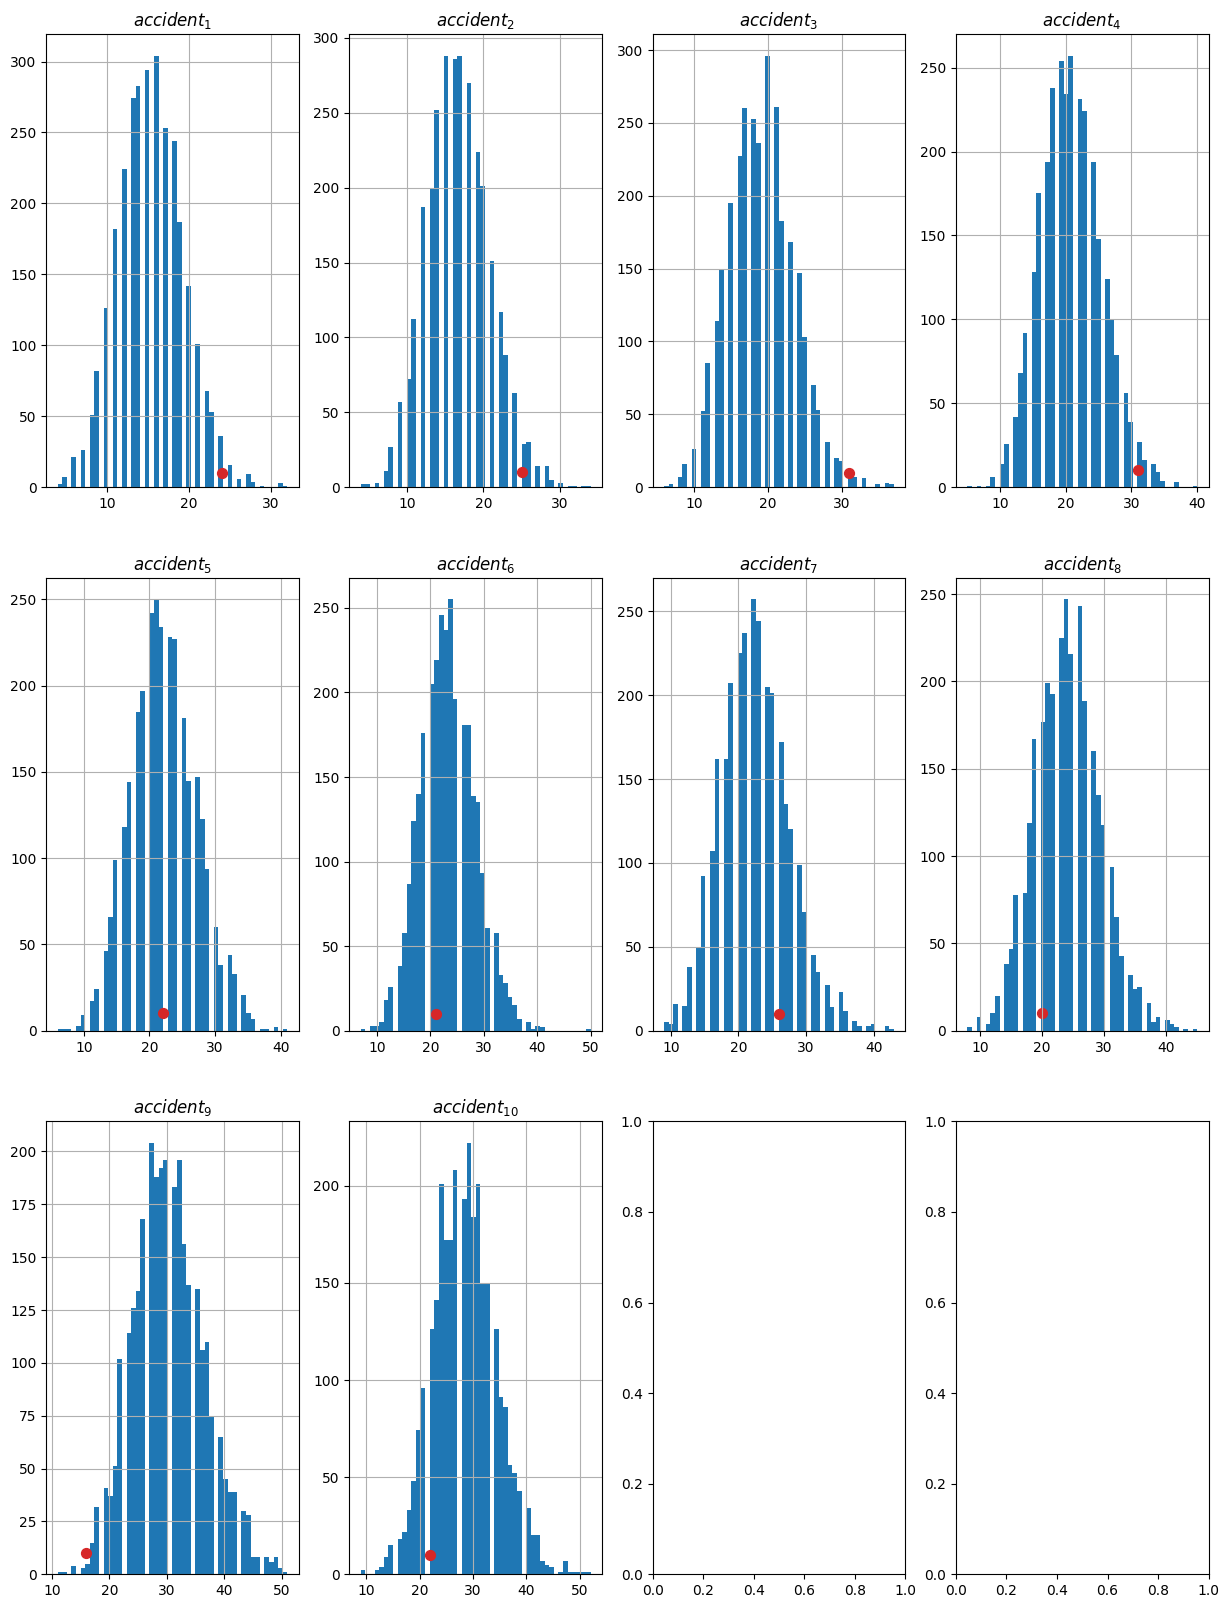

In [30]:
fig, ax = plt.subplots(3,4, figsize=(15,20))
for i in range(1,11):
    ax[(i-1)//4][(i-1)%4].hist(fit_pd[f"accidents_sim[{i}]"],bins=50)
    ax[(i-1)//4][(i-1)%4].scatter(y[i-1],[10],s=50, color='tab:red')
    ax[(i-1)//4][(i-1)%4].set_title(f"$accident_{{{i}}}$")
    ax[(i-1)//4][(i-1)%4].grid()

In [31]:
data_3 ={'N':len(df),'miles':x.values}

model_3 = CmdStanModel(stan_file='airline_prior_1.stan')

sim = model_3.sample(data=data_3, fixed_param=True)

14:46:32 - cmdstanpy - INFO - CmdStan start processing
chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed


14:46:32 - cmdstanpy - INFO - CmdStan done processing.


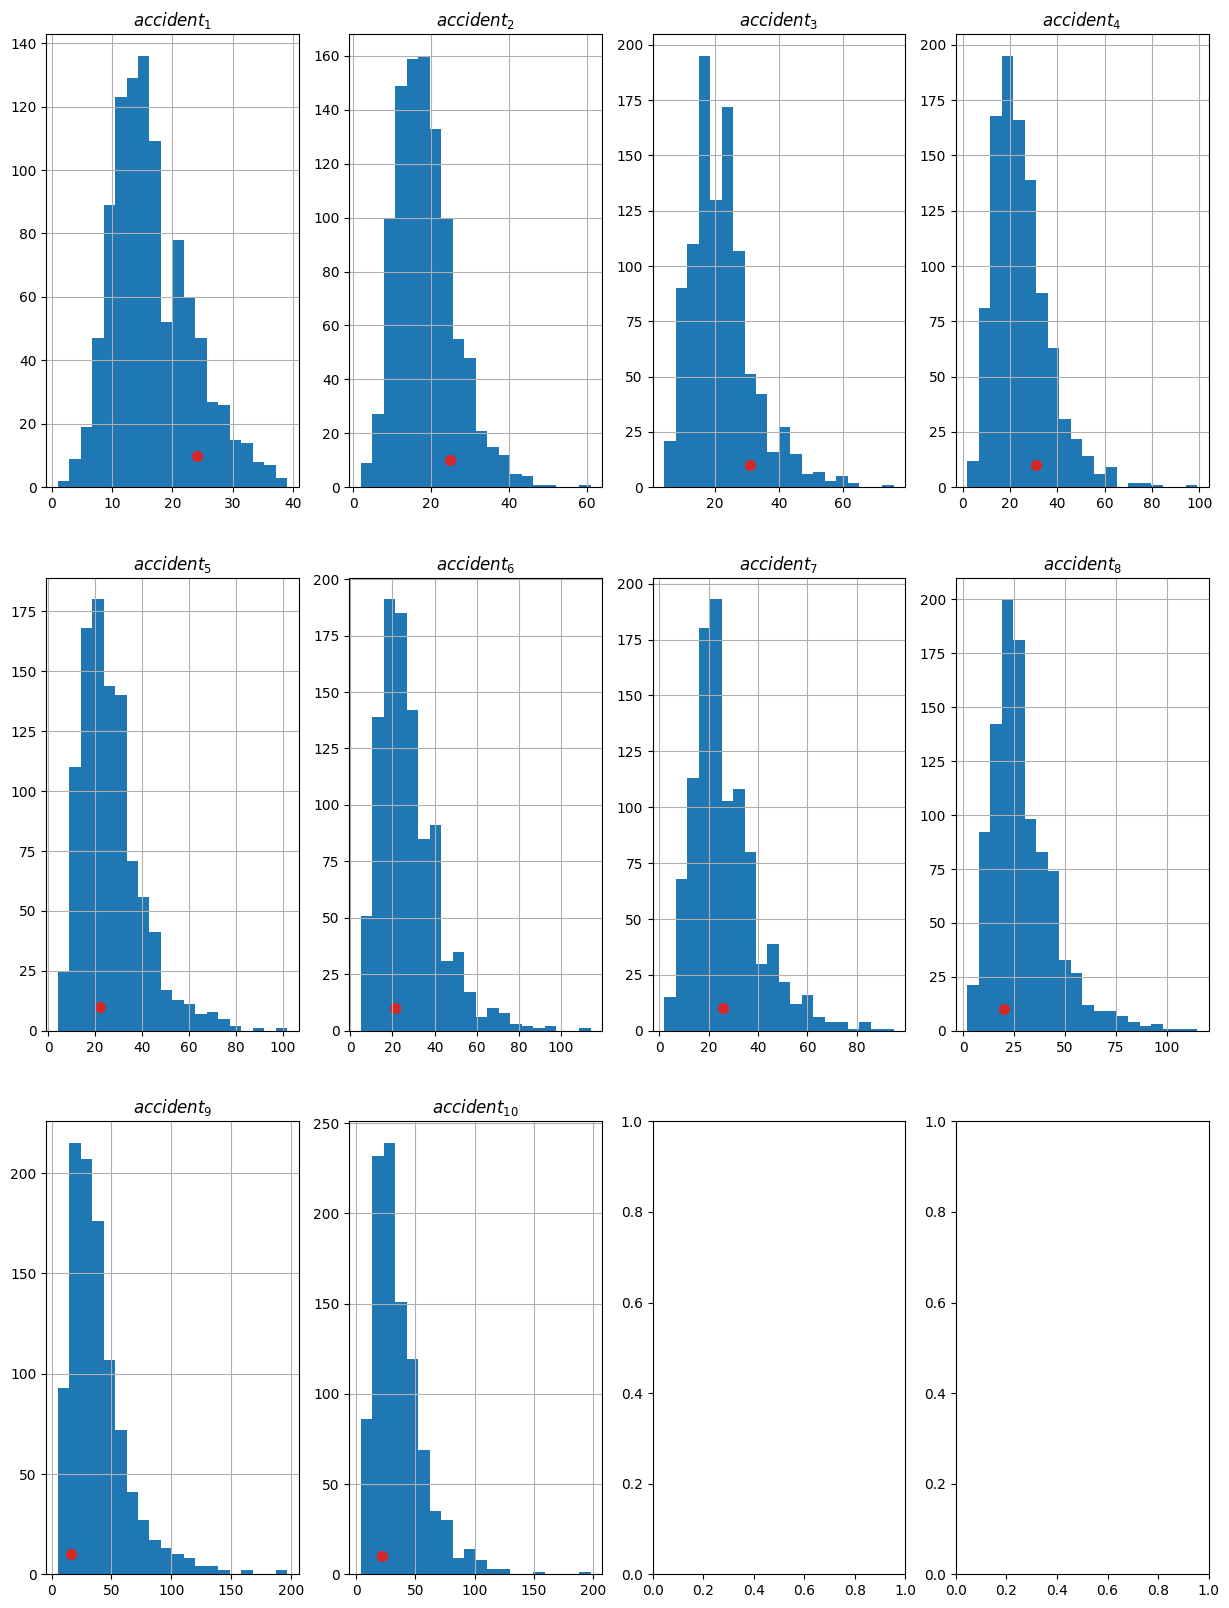

In [32]:
solo = sim.draws_pd()
fig, ax = plt.subplots(3,4, figsize=(15,20))
for i in range(1,11):
    ax[(i-1)//4][(i-1)%4].hist(solo[f"y_sim[{i}]"],bins=20)
    ax[(i-1)//4][(i-1)%4].scatter(y[i-1],[10],s=50, color='tab:red')
    ax[(i-1)//4][(i-1)%4].set_title(f"$accident_{{{i}}}$")
    ax[(i-1)//4][(i-1)%4].grid()